In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
from sklearn import metrics 
from sklearn.datasets import load_breast_cancer

In [164]:
data = load_breast_cancer()
x = data.data
y = data.target

C = [10, 1, 0.1, 0.01]
#print(data.keys())
#print(data.target)

In [168]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state=0)

xTrainSc = StandardScaler()
xTrain = xTrainSc.fit_transform(xTrain)
xTest = xTrainSc.fit_transform(xTest)
#classifier = LogisticRegression(random_state=0)
#classifier.fit(xTrain, yTrain)
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(xTrain, yTrain)
    print('C: ', c)
    print('Training accuracy:', clf.score(xTrain,yTrain))
    print('Test accuracy:', clf.score(xTest,yTest))
    print('')
model = LogisticRegression(solver='liblinear')
model.fit(xTrain, yTrain)
predicted = model.predict(xTest)
matrix = confusion_matrix(yTest, predicted)
report = classification_report(yTest, predicted)
print(report)

C:  10
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193

C:  1
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193

C:  0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158

C:  0.01
Training accuracy: 0.9274725274725275
Test accuracy: 0.9210526315789473

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [169]:
yPredic = classifier.predict(xTest) 
cnf_matrix = confusion_matrix(yTest, yPredic) 

print("Accuracy:",metrics.accuracy_score(yTest, yPredic)) 
print("Precision:",metrics.precision_score(yTest, yPredic)) 
print("Recall:",metrics.recall_score(yTest, yPredic)) 

Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

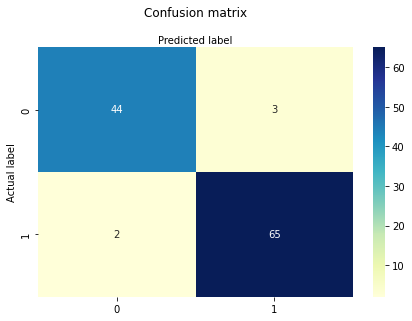

In [170]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 